In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/DM

/content/drive/MyDrive/DM


Saving 470194571_122158735556302622_6386677097194224711_n.jpg to 470194571_122158735556302622_6386677097194224711_n.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Prediction: 0.5198750495910645
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: 0.5177749395370483
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: 0.5168928503990173
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: 0.5178279280662537


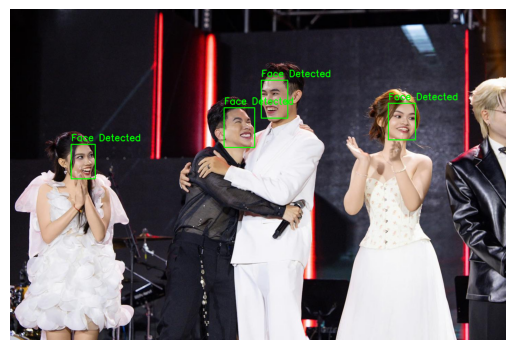

In [2]:
# Cài đặt các thư viện cần thiết
!pip install tensorflow opencv-python mtcnn

# Import các thư viện cần thiết
import tensorflow as tf  # Thư viện TensorFlow cho machine learning và deep learning
from tensorflow.keras import layers, models  # Module Keras của TensorFlow để xây dựng mô hình mạng nơ-ron
from tensorflow.keras.preprocessing import image  # Module để xử lý và tiền xử lý hình ảnh
import numpy as np
import cv2  # Thư viện OpenCV cho xử lý hình ảnh và video
import matplotlib.pyplot as plt  # Thư viện Matplotlib để hiển thị hình ảnh
from mtcnn.mtcnn import MTCNN  # Thư viện MTCNN để phát hiện khuôn mặt
from google.colab import files  # Module để tải file lên từ máy tính trong Google Colab

# Hàm chuẩn bị dữ liệu đầu vào
def preprocess_image(img):
    img = cv2.resize(img, (150, 150))  # Thay đổi kích thước ảnh thành 150x150 pixel
    img_array = image.img_to_array(img)  # Chuyển đổi ảnh thành mảng numpy
    img_array = np.expand_dims(img_array, axis=0)  # Thêm một chiều để phù hợp với đầu vào của mô hình
    img_array = img_array / 255.0  # Chuẩn hóa giá trị pixel từ 0-255 về khoảng 0-1
    return img_array  # Trả về mảng ảnh đã được tiền xử lý

# Xây dựng mô hình CNN
def create_cnn_model():
    model = models.Sequential()  # Khởi tạo mô hình Sequential
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # Lớp tích chập 2D với 32 bộ lọc, kích thước kernel 3x3, hàm kích hoạt ReLU và kích thước đầu vào là 150x150x3
    model.add(layers.MaxPooling2D((2, 2)))  # Lớp gộp cực đại với kích thước 2x2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Lớp tích chập 2D với 64 bộ lọc, kích thước kernel 3x3, hàm kích hoạt ReLU
    model.add(layers.MaxPooling2D((2, 2)))  # Lớp gộp cực đại với kích thước 2x2
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Lớp tích chập 2D với 128 bộ lọc, kích thước kernel 3x3, hàm kích hoạt ReLU
    model.add(layers.MaxPooling2D((2, 2)))  # Lớp gộp cực đại với kích thước 2x2
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Lớp tích chập 2D với 128 bộ lọc, kích thước kernel 3x3, hàm kích hoạt ReLU
    model.add(layers.MaxPooling2D((2, 2)))  # Lớp gộp cực đại với kích thước 2x2
    model.add(layers.Flatten())  # Lớp dàn phẳng để chuyển đổi dữ liệu từ 2D sang 1D
    model.add(layers.Dense(512, activation='relu'))  # Lớp dense với 512 neuron và hàm kích hoạt ReLU
    model.add(layers.Dense(1, activation='sigmoid'))  # Lớp output với 1 neuron và hàm kích hoạt sigmoid cho bài toán phân loại nhị phân
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Biên dịch mô hình với trình tối ưu hóa Adam, hàm loss là binary_crossentropy và theo dõi độ chính xác
    return model  # Trả về mô hình CNN

cnn_model = create_cnn_model()  # Tạo mô hình CNN và lưu vào biến cnn_model

# Hàm phát hiện và nhận diện khuôn mặt
def detect_and_recognize_faces(img_path, model):
    img = cv2.imread(img_path)  # Đọc ảnh từ đường dẫn
    detector = MTCNN()  # Khởi tạo bộ phát hiện khuôn mặt MTCNN
    faces = detector.detect_faces(img)  # Phát hiện các khuôn mặt trong ảnh

    if not faces:  # Nếu không phát hiện được khuôn mặt nào
      print("Không nhận diện được khuôn mặt")  # In thông báo
      plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Hiển thị ảnh gốc không có khuôn mặt
      plt.axis('off')  # Tắt hiển thị trục
      plt.show()  # Hiển thị ảnh
      return  # Kết thúc hàm

    for face in faces:  # Lặp qua từng khuôn mặt phát hiện được
        x, y, width, height = face['box']  # Lấy tọa độ và kích thước của hộp chứa khuôn mặt
        face_img = img[y:y+height, x:x+width]  # Trích xuất phần ảnh chứa khuôn mặt
        face_array = preprocess_image(face_img)  # Chuẩn bị dữ liệu đầu vào cho mô hình
        prediction = model.predict(face_array)  # Dự đoán khuôn mặt sử dụng mô hình CNN

        # Thêm đoạn kiểm tra và hiển thị giá trị dự đoán
        print(f"Prediction: {prediction[0][0]}")

        label = 'Face Detected' if prediction > 0.4 else 'No Face Detected'  # Gán nhãn cho khuôn mặt dựa trên ngưỡng 0.4

        cv2.rectangle(img, (x, y), (x+width, y+height), (0, 255, 0), 2)  # Vẽ hình chữ nhật quanh khuôn mặt
        cv2.putText(img, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Viết nhãn trên hình chữ nhật

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Hiển thị ảnh với các khuôn mặt được phát hiện
    plt.axis('off')  # Tắt hiển thị trục
    plt.show()  # Hiển thị ảnh

# Tải tệp ảnh từ máy tính
uploaded = files.upload()
for filename in uploaded.keys():
    img_path = filename

# Thực hiện nhận diện khuôn mặt và vẽ các ô vuông
detect_and_recognize_faces(img_path, cnn_model)
